In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
#Set random seed for reproducibility
np.random.seed(42)

### Generate random data for hours studied (Feature1) and test scores (target)

In [3]:
n_samples=500
X1=np.random.uniform(1,10,n_samples) #Random hours studiied
noise=np.random.uniform(0,5,n_samples) #Random noise
y = 10 * X1 + noise #Linear relationship with noise

### Create a dataframe for easy manipulation

In [5]:
data=pd.DataFrame({'Hours_Studied':X1,'Test_Score':y})
data.head()

,Hours_Studied,Test_Score
0,4.370861,47.199419
1,9.556429,98.244769
2,7.587945,77.427093
3,6.387926,67.948239
4,2.404168,27.465334


### Scatterplot to visualize the relationship

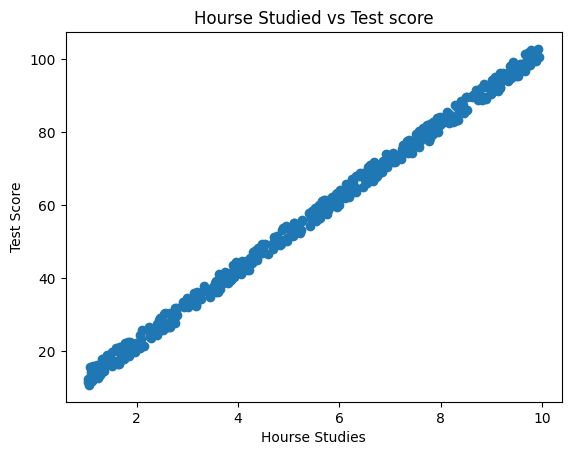

In [7]:
plt.scatter(data['Hours_Studied'],data['Test_Score'])
plt.title('Hourse Studied vs Test score')
plt.xlabel('Hourse Studies')
plt.ylabel('Test Score')
plt.show()

### Check the correlation between features and target

In [8]:
corr_matrix=data.corr()
print(corr_matrix)

               Hours_Studied  Test_Score
Hours_Studied       1.000000    0.998595
Test_Score          0.998595    1.000000


### Split the dataset into independent variable(X) and dependent variable (Y)


In [9]:
X = data[['Hours_Studied']]
y = data['Test_Score']

#Split the dataset into training and  testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2, random_state=42)

### Scale the feature using Standard scaler

In [10]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Istantiate the linear regression model

In [11]:
model=LinearRegression()

#train the model on the training data
model.fit(X_train_scaled,Y_train)

#check the model's coefficients and intercepts
print("Coefficient: ",model.coef_)
print("Intercept: ",model.intercept_)

Coefficient:  [26.97855983]
Intercept:  57.787854685905025


### Example of predicting a single value using a new data point


In [12]:
new_data=np.array([[6]]) #example vlue for hours studied
new_data_df=pd.DataFrame(new_data,columns=['Hours_Studied'])

#scale the new data
new_data_scaled=scaler.transform(new_data_df)

### Predict the test score

In [13]:
single_prediction = model.predict(new_data_scaled)
print(f"Predicted Test score for 6 hours of study: {single_prediction[0]}")

Predicted Test score for 6 hours of study: 62.44647150651628


### Predict on the test set

In [14]:
y_pred = model.predict(X_test_scaled)

#Calculate Mean Squared Error (MSE) and R-Squared
mse = mean_squared_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 1.9480032513511996
R-Squared: 0.9971985571991646


### Save the trained model to a file

In [15]:
joblib.dump(model,'linear_regression_model.pkl')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

### Load the saved model, scaler and preduct new data 

In [16]:
loaded_model=joblib.load('linear_regression_model.pkl')
loaded_scaler=joblib.load('scaler.pkl')

new_data=np.array([[6]]) #example vlue for hours studied
new_data_df=pd.DataFrame(new_data,columns=['Hours_Studied'])

#scale the new data using the loaded scaler
new_data_scaled=loaded_scaler.transform(new_data_df)

#Make the prediction using the loaded model
single_prediction = loaded_model.predict(new_data_scaled)

#Output the predicted test score
print(f"Predicted test score for 6 hours of study: {single_prediction[0]}")

Predicted test score for 6 hours of study: 62.44647150651628
